# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# Read the data
df = pd.read_csv('foodhub_order.csv')

# Returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# Prints out the number of rows and columns present in the dataset
df.shape

(1898, 9)

#### Observations: 

There are 1898 rows and 9 columns present in the dataset. 


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Prints out a summary of the different datatypes used in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

There are three different datatypes used in the dataset. 

Columns order_id, customer_id, food_preparation_time, and delivery_time use datatype int64. 

Columns restaurant_name, cuisine_type, day_of_the_week, and rating use datatype object. 

Only one column, cost_of_the_order, uses datatype float64. 

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [5]:
# Checks for any missing values in the data
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:

It appears that there are no missing values in the dataset as each column has 0. 


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [6]:
# Prints out the statistical summary of the data
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:

The output above is the statistical summary of the numerical data. 

The minimum food preparation time is 20 minutes. 

The average food preparation time is 27.37 minutes. 

The maximum food preparation time is 35 minutes. 


### **Question 5:** How many orders are not rated? [1 mark]

In [7]:
# Prins out the value counts for the rating column, which should contain information on how many orders are not rated
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:

There are 736 orders that were not rated. 


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [8]:
# Checks the number of unique order ids
df['order_id'].nunique()

1898

The number of unique ids is 1898, which correlates with the number of rows in the dataset. 

In [9]:
# Checks the number of unique customer ids
df['customer_id'].nunique()

1200

In [10]:
# Checks the number of unique restaurant names
df['restaurant_name'].nunique()

178

In [11]:
# Checks the number of unique cuisine types
df['cuisine_type'].nunique()

14

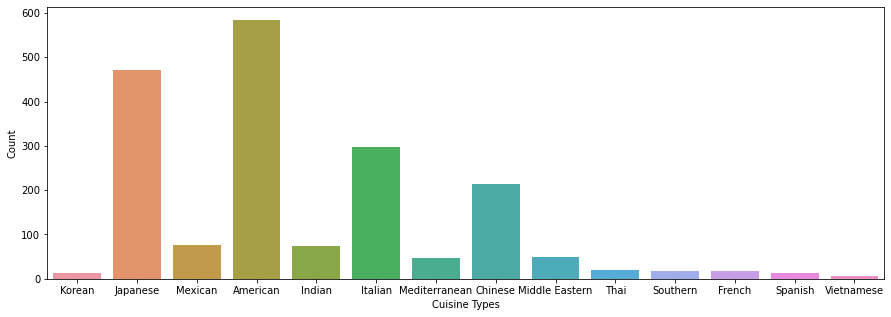

In [12]:
# Displays a count plot of the different cuisine types in the dataset

plt.figure(figsize = (15,5))                     # Sets figure size
sns.countplot(data = df, x = 'cuisine_type')     # Generates count plot of cuisine types
plt.xlabel('Cuisine Types')                      # Define x-label
plt.ylabel('Count')                              # Define y-label
plt.show()                                       # Display count plot


# According to the count plot below, American is the most popular cuisine type. 
# Japanese, Italian, and Chinese are also popular cuisine types among FoodHub users. 

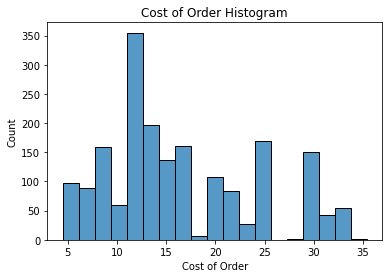

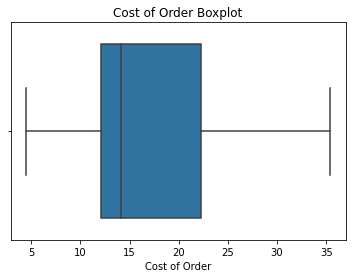

In [13]:
# Displays histogram for the cost of order
sns.histplot(data=df,x='cost_of_the_order')      # Generates histogram
plt.title('Cost of Order Histogram')             # Sets title
plt.xlabel('Cost of Order')                      # Sets x-label
plt.ylabel('Count')                              # Sets y-label
plt.show()                                       # Displays histogram

# Displays boxplot for the cost of order
sns.boxplot(data=df,x='cost_of_the_order')       # Generates boxplot
plt.title('Cost of Order Boxplot')               # Sets title
plt.xlabel('Cost of Order')                      # Sets x-label
plt.show()                                       # Displays boxplot


# In the histogram, the peak count for cost of order is around $12. 
# In the boxplot, the median is at ~$14. Q1 is around $12 and Q3 is around $23. 

In [14]:
# Counts the number of unique values in the days of the week column
df['day_of_the_week'].nunique()

2

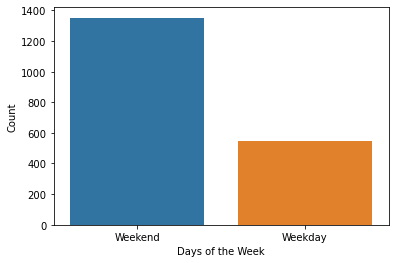

In [15]:
# Displays bar graph for the days of the week column
sns.countplot(data = df, x = 'day_of_the_week')       # Generates bar graph
plt.xlabel('Days of the Week')                        # Sets x-label
plt.ylabel('Count')                                   # Sets y-label
plt.show()                                            # Displays bar graph


# Far more orders were made in the weekend than in the weekday

In [16]:
# Checks the number of unique values in the ratings column
df['rating'].nunique()

4

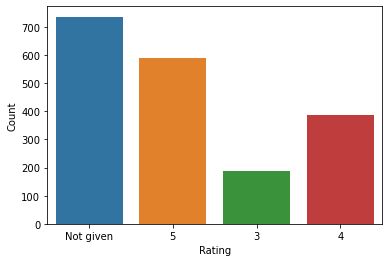

In [17]:
# Displays bar graph for ratings
sns.countplot(data = df, x = 'rating')                # Generates bar graph
plt.xlabel('Rating')                                  # Sets x-label
plt.ylabel('Count')                                   # Sets y-label
plt.show()                                            # Displays bar graph


# The plurality of orders have their ratings as 'Not given.' 
# Among actual ratings, 5 is the most common while 3 is the least common. 

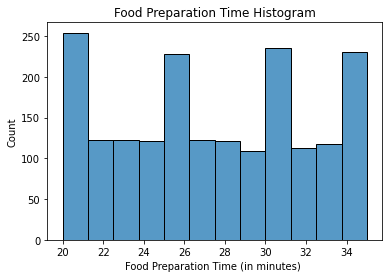

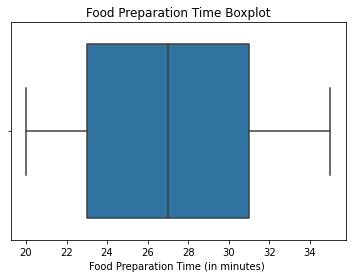

In [18]:
# Displays histogram for food preparation time
sns.histplot(data=df,x='food_preparation_time')         # Generates histogram
plt.title('Food Preparation Time Histogram')            # Sets title
plt.xlabel('Food Preparation Time (in minutes) ')       # Sets x-label
plt.ylabel('Count')                                     # Sets y-label
plt.show()                                              # Displays histogram

# Displays boxplot for food preparation time
sns.boxplot(data=df,x='food_preparation_time')          # Generates boxplot
plt.title('Food Preparation Time Boxplot')              # Sets title
plt.xlabel('Food Preparation Time (in minutes) ')       # Sets x-label
plt.show()                                              # Displays boxplot


# The histogram has mostly uniform distribution. But there are peaks around 20, 25.5, 31, and 35. 
# In the boxplot, the median food preparation time is at 27 minutes. Q1 is at 23 minutes and Q3 at 31 minutes. 

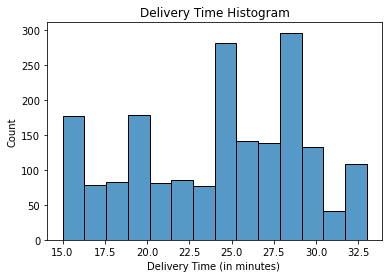

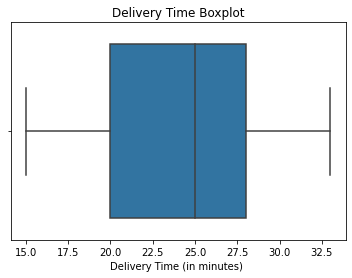

In [19]:
# Displays histogram for delivery time
sns.histplot(data=df,x='delivery_time')         # Generates histogram
plt.title('Delivery Time Histogram')            # Sets title
plt.xlabel('Delivery Time (in minutes) ')       # Sets x-label
plt.ylabel('Count')                             # Sets y-label
plt.show()                                      # Displays histogram

# Displays boxplot for delivery time
sns.boxplot(data=df,x='delivery_time')          # Generates boxplot
plt.title('Delivery Time Boxplot')              # Sets title
plt.xlabel('Delivery Time (in minutes) ')       # Sets x-label
plt.show()                                      # Displays boxplot


# The histogram for delivery time has mostly uniform distribution, with the two biggest peaks around 24.5 and 28 minutes. 
# In the boxplot, the median delivery time is at 25 minutes. Q1 is at 20 minutes and Q3 is at 28 minutes. 

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [20]:
# Ranks the top 5 restaurants in terms of number of orders received
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:

The top 5 restaurants in terms of the number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm. 

Shake Shack is ranked at first with 219 orders received. The Meatball Shop is at second with 132 orders received. Blue Ribbon Sushi is third with 119 orders received. Blue Ribbon Fried Chicken is fourth with 96 orders received. Parm is fifth with 68 orders received. 


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [21]:
# Displays the most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']         # Obtains a subset of data where the day of the week is a weekend
df_weekend['cuisine_type'].value_counts().idxmax()          # Displays the top ranked cuisine type

'American'

#### Observations:

The most popular cuisine on weekends is American. 

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [22]:
# Get orders that cost above $20 
df_greater_than_20 = df[df['cost_of_the_order']>20] 

# Calculate the number of total orders where the cost is above $20 
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of orders above $20 in the dataset
percentage = (len(df_greater_than_20) / len(df)) * 100

# Display the percentage of orders above $20
print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


#### Observations:

The total number of orders that cost above 20 dollars in the dataset is 555. 

With this count in mind, the percentage of orders above 20 dollars in the dataset is 29.24%. 


### **Question 10**: What is the mean order delivery time? [1 mark]

In [23]:
# Get the mean delivery time
mean_delivery_time = df['delivery_time'].mean()

# Displays a sentence that presents the mean delivery time
print('The mean delivery time for this dataset is', round(mean_delivery_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


#### Observations:

The mean order delivery time is 24.16 minutes. 

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [24]:
# Get the number of orders placed by the top 3 customer IDs
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:

The top 3 customer IDs by the number of orders they placed are 52832, 47440, and 83287. These three are eligible for the 20% discount voucher the company wants to give away. 

52832 is the first ranked with 13 orders placed. 47440 is second with 10 orders placed. 83287 is third with 9 orders placed. 

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


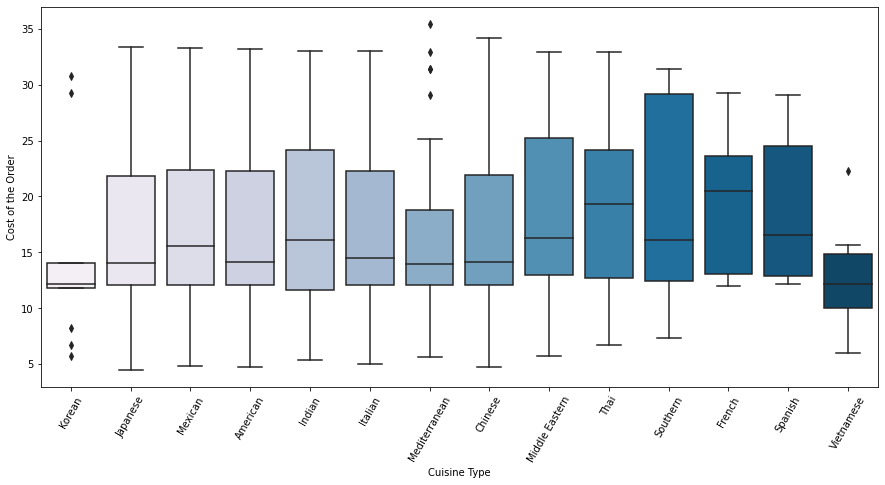

In [25]:
# Boxplot on the relationship between cost of order and cuisine type
plt.figure(figsize=(15,7))                                                                 # Sets figure size
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')      # Generates boxplot
plt.xticks(rotation = 60)                                                                  # Rotates the x-axis tick labels
plt.xlabel("Cuisine Type")                                                                 # Sets x-label
plt.ylabel('Cost of the Order')                                                            # Sets y-label
plt.show()                                                                                 # Display boxplot


# Mediterranean and Korean cuisines stands out with multiple outliers in their boxplots. 
# French cuisine has the highest median for cost of order. 
# Korean and Vietnamese cuisines have the lowest median cost of order. 

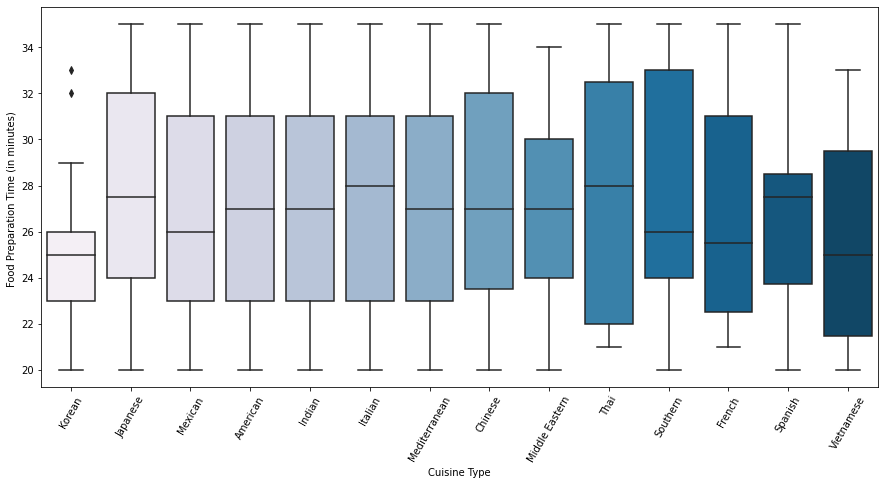

In [26]:
# Boxplot on the relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))                                                                 # Sets figure size
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')  # Generates boxplot
plt.xticks(rotation = 60)                                                                  # Rotates the x-axis tick labels
plt.xlabel("Cuisine Type")                                                                 # Sets x-label
plt.ylabel('Food Preparation Time (in minutes) ')                                          # Sets y-label
plt.show()                                                                                 # Display boxplot


# Korean cuisine is the only boxplot with outliers. 
# Italian and Thai cuisines have the highest median food preparation time. 
# Korean and Vietnamese cuisines have the lowest median food preparation time. 

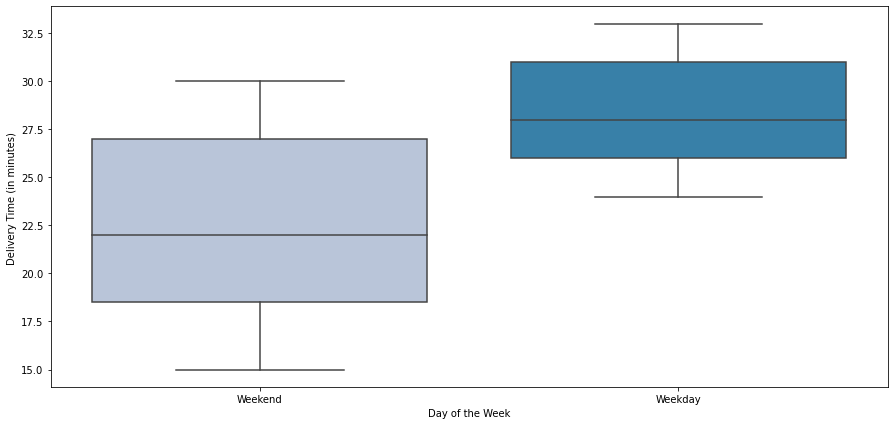

In [27]:
# Boxplot on the relationship between day of the week and delivery time
plt.figure(figsize=(15,7))                                                                 # Sets figure size
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu')       # Generates boxplot
plt.xlabel("Day of the Week")                                                              # Sets x-label
plt.ylabel('Delivery Time (in minutes) ')                                                  # Sets y-label
plt.show()                                                                                 # Display boxplot


# Weekdays have considerably higher delivery times than weekends. 
# The minimum delivery time for weekdays is actually higher than the median delivery time for weekends. 

In [28]:
# Ranks the top 10 restaurants by revenue generated (sum of cost of the order) 
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(10) 

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Name: cost_of_the_order, dtype: float64

#### Restaurant Names Ranked by Total Revenue

The output above displays the top 10 restaurant names by revenue generated. The revenue was calculated by taking the sum of their cost of order values. The top ranked restaurant name is Shake Shack, generating a total revenue of 3579.53 dollars. There are 4 other restaurant names that also genereated revenues above 1000 dollars. These are The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm. The 10th ranked restaurant name is Blue Ribbon Sushi Bar & Grill, which generated a total revenue of 666.62 dollars. 

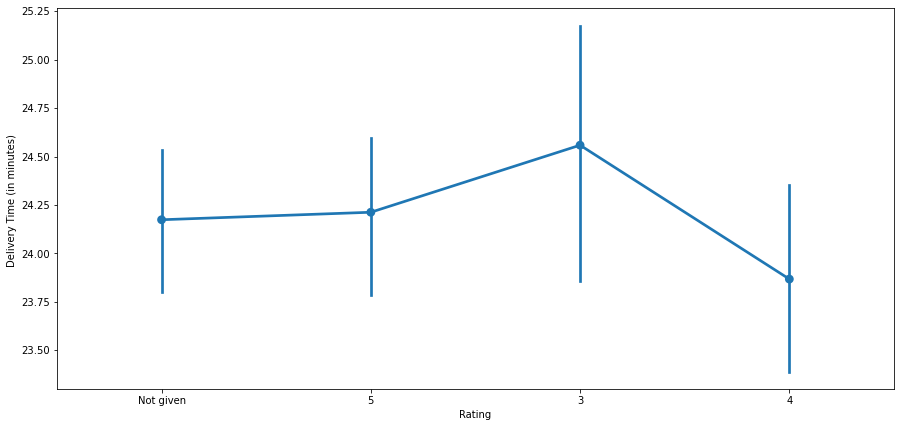

In [29]:
# Point plot on the relationship between rating and delivery time
plt.figure(figsize=(15, 7))                                                       # Sets figure size              
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)                       # Generates point plot
plt.xlabel("Rating")                                                              # Sets x-label
plt.ylabel('Delivery Time (in minutes) ')                                         # Sets y-label
plt.show()                                                                        # Displays point plot


# Orders with 3/5 ratings have higher delivery times than the other rating types. 
# The extended delivery time could be a factor for the 3/5 ratings. 
# Orders with 4/5 ratings have the lowest delivery times. 

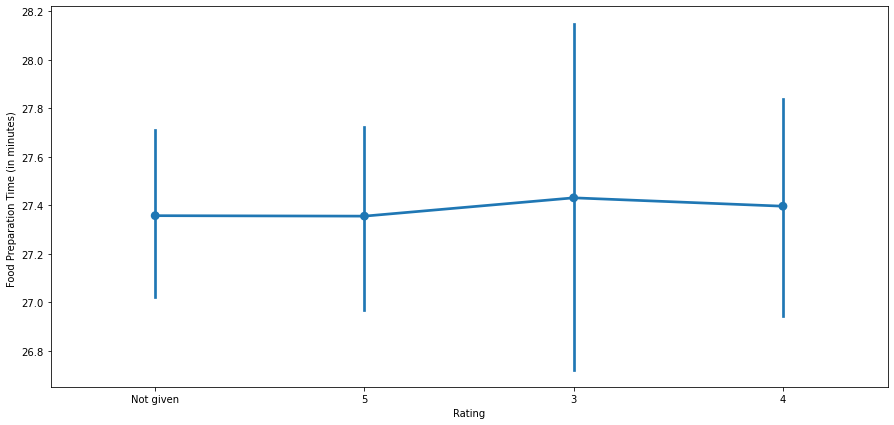

In [30]:
# Point plot on the relationship between rating and food preparation time
plt.figure(figsize=(15, 7))                                                       # Sets figure size              
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)               # Generates point plot
plt.xlabel("Rating")                                                              # Sets x-label
plt.ylabel('Food Preparation Time (in minutes) ')                                 # Sets y-label
plt.show()                                                                        # Displays point plot


# Orders with 3/5 ratings have slightly higher food preparation time compared to other rating types. 
# Orders with either 'Not given' or 5/5 ratings have near equal food preparation time. 

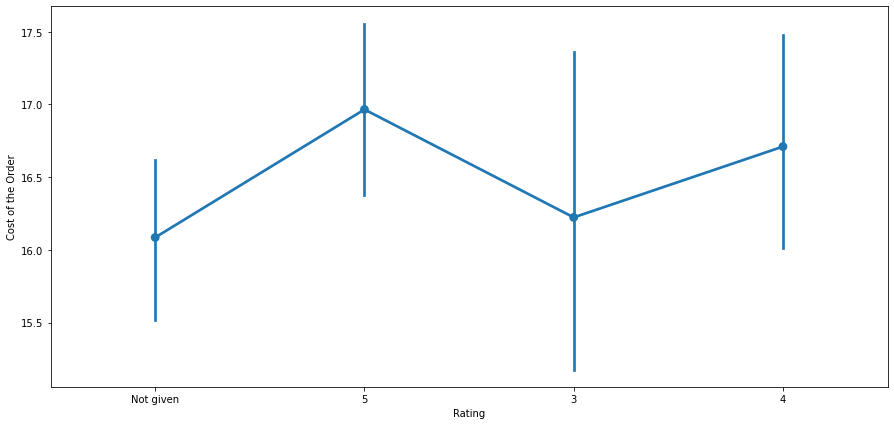

In [31]:
# Point plot on the relationship between rating and cost of the order
plt.figure(figsize=(15, 7))                                                       # Sets figure size              
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)                   # Generates point plot
plt.xlabel("Rating")                                                              # Sets x-label
plt.ylabel('Cost of the Order')                                                   # Sets y-label
plt.show()                                                                        # Displays point plot


# Orders with 5/5 ratings have the highest cost of order of around $17. 
# Orders with ratings 'Not given' have the lowest cost of order. 

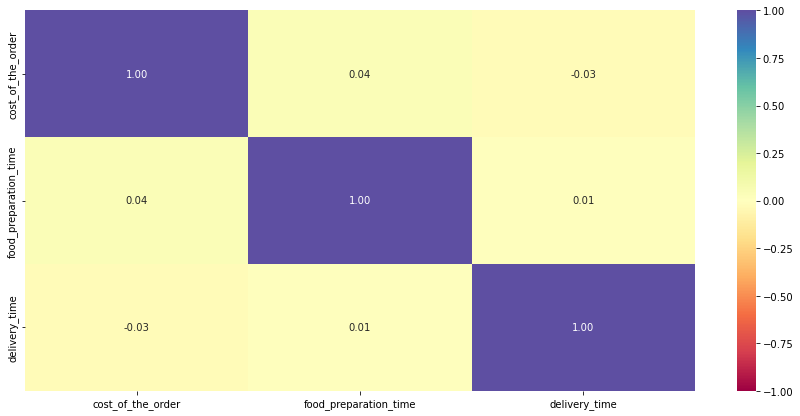

In [32]:
# Plot a heatmap showing the correlation between the variables
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']                 # Lists the variables used in heatmap
plt.figure(figsize=(15, 7))                                                                # Sets figure size
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")  # Generates heatmap
plt.show()                                                                                 # Displays heatmap 


# The correlations between cost of order, food preparation time, and delivery time are near zeros across the board. 
# This suggests that there are no correlations between these three variables in the dataset. 
# Cost of order vs. food preparation time has a very slight positive correlation of 0.04. 
# Food preparation time vs. delivery time also has a very slight positive correlation of 0.01. 
# Cost of order vs. delivery time has a very slight negative correlation of -0.03. 

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [33]:
# Filters out restaurants with 'Not given' ratings
df_rated = df[df['rating'] != 'Not given'].copy()

# Converts ratings from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')  

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head() 

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [34]:
# Obtains restaurant names with rating counts more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']

# Filter to get the data of restaurants with rating counts more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names by their average rating
mean_ratings = df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index().dropna()
mean_ratings

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:

From the generated dataframe of restaurants without 'Not given' ratings, the restaurant name with the highest number of numerical ratings is Shake Shack with a total of 133 ratings. The three other restaurants with rating counts above 50 are The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken. 

After filtering the data, the restaurants that meet the criteria of having more than 50 ratings and an average rating greater than 4 are The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, and Blue Ribbon Sushi.

The Meatball Shop is the highest ranked restaurant name with an average rating of 4.511905. The lowest ranked restaurant name of the four is Blue Ribbon Sushi, with an average rating of 4.219178. 

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [35]:
# Function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25           # If the cost is greater than 20 dollars, the company charges 25%
    elif x > 5:
        return x*0.15           # If the cost is greater than 5 dollars, the company charges 15%
    else:
        return x*0              # If the cost is less than 5 dollars, then zero is returned

    
# Applies the function to the cost_of_the_order column for revenue computation 
df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)

In [36]:
# Obtain the total revenue 
total_rev = df['Revenue'].sum() 

# Prints out a statement on the net revenue generated by the company
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observations:

When the company charges 25% on orders greater than 20 dollars and 15% on orders greater than 5 dollars, the net revenue generated by the company across all orders is 6166.3 dollars. 

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [37]:
# Calculates the total time for each order (food preparation time + delivery time)
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the percentage of orders that take more than 60 minutes
percentage_above_60_minutes = (df[df['total_time'] > 60].shape[0] / df.shape[0]) * 100

# Displays the result with a statement
print(f"Percentage of orders taking more than 60 minutes: {percentage_above_60_minutes:.2f}%")

Percentage of orders taking more than 60 minutes: 10.54%


#### Observations:

By taking the total time required to prepare and deliver food orders, the percentage of orders that take more than 60 minutes is 10.54%. 

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [38]:
# Create a new column 'day_type' to indicate whether it's a weekday or weekend
df['day_type'] = df['day_of_the_week'].apply(lambda x: 'Weekend' if x == 'Weekend' else 'Weekday')

# Calculate the mean delivery time for weekdays and weekends
mean_delivery_time_by_day = df.groupby('day_type')['delivery_time'].mean()

# Display the result
print("Mean Delivery Time:")
print(mean_delivery_time_by_day)

Mean Delivery Time:
day_type
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


In [39]:
# Import scipy for t-test functions
from scipy.stats import ttest_ind

# Separate the delivery times for weekdays and weekends
weekday_delivery_times = df[df['day_type'] == 'Weekday']['delivery_time'].dropna()
weekend_delivery_times = df[df['day_type'] == 'Weekend']['delivery_time'].dropna()

# Perform t-test to compare means
t_statistic, p_value = ttest_ind(weekday_delivery_times, weekend_delivery_times, equal_var=False)

# Display the satistical results
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

# Check for statistical significance 
alpha = 0.05
if p_value < alpha:
    print("The difference in mean delivery time between weekdays and weekends is statistically significant.")
else:
    print("There is no statistically significant difference in mean delivery time between weekdays and weekends.")

T-statistic: 33.26
P-value: 0.0000
The difference in mean delivery time between weekdays and weekends is statistically significant.


#### Observations:

There are very noticable variations in the mean delivery time between weekdays and weekends. The mean delivery time on weekdays is 28.340037 minutes, which is greater than the mean delivery time on weekends at 22.470022 minutes. 

To ensure the differences in mean delivery time between weekdays and weekends are statistically significant, a hypothesis test was performed. The calculated t-statistic was 33.26 and the p-value was 0.0000. Since the p-value is less than 0.05, the difference in mean delivery time between weekdays and weekends is statistically significant. 


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  There are four restaurant names that stand out in popularity, both in number of ratings and average ratings. Those four restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Fried Chicken, and Blue Ribbon Sushi. 

*  American cuisine is the most popular among the users of FoodHub. However, other cuisine types are also popular among FoodHub users like Japanese, Italian, and Chinese. 

*  The mean delivery time on weekdays is greater than the mean delivery time on weekends at a 5% significance level. This makes sense as there is likely higher demand for food delivery during the weekdays. The amount of people working from home and street traffic in New York are likely factors. 

### Recommendations:

*  The app algorithm should be modified to place the most in-demand restaurants at the top of the app (Shake Shack, The Meatball Shop, Blue Ribbon Fried Chicken, and Blue Ribbon Sushi). That way, the customer can access the restaurant they want much more quickly and make an order. 

*  Likewise, restaurants with more 5 star ratings should be promoted more in the FoodHub algorithm. Orders with 5-star ratings have reasonable total delivery times and the cost of the order is generally higher. This change can achieve improvements in both customer satisfaction and company net revenue. 

*  The four most popular cuisine types (American, Japanese, Italian, and Chinese) should also be promoted more in the FoodHub app. This will enhance the customer experience by giving more exposure to high-demand cuisine types, possibly leading to more user spending. 

---